In [13]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [14]:
X,y = make_blobs(1000,2,centers=2)

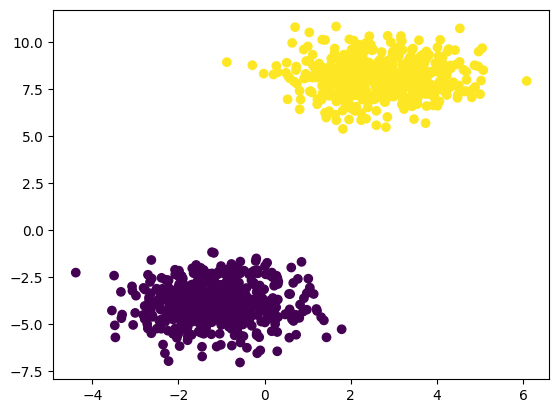

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

In [25]:
class MLP:
    def __init__(self,InputL,hiddenLayers,OutputL):

        self.weights = []
        self.bias = []

        self.weights.append(np.random.normal(0,1/np.sqrt(InputL),size=(InputL,hiddenLayers[0])))
        self.bias.append(np.zeros((hiddenLayers[0],)))

        for i in range(1,len(hiddenLayers)):
            self.weights.append(np.random.normal(0,1/np.sqrt(hiddenLayers[i-1]),size=(hiddenLayers[i-1],hiddenLayers[i])))
            self.bias.append(np.zeros((hiddenLayers[i],)))

        self.weights.append(np.random.normal(0,1/np.sqrt(hiddenLayers[-1]),size=(hiddenLayers[-1],OutputL)))
        self.bias.append(np.zeros((OutputL,)))

    def activation(self,Z):
        return 1/(1+np.exp(-Z))

    def fit(self,X,y,lr = 0.01,epochs = 1000):
        self.backward(X,y,lr,epochs)

    def predict(self,X):
        ypred = self.forward(X)
        ypred[ypred >= 0.5] = 1
        ypred[ypred < 0.5] = 0
        return ypred
        
    def forward(self,X):
        
        a = X
        self.output = [a]
        for i in range(len(self.weights)):
            z = a@self.weights[i] + self.bias[i]
            a = self.activation(z)
            self.output.append(a)
            
        return a

    def derA(self,Z):
        return Z*(1-Z)

    def backward(self,X,y,lr = 0.01,epochs = 100):

        for e in range(epochs):
            ypred = self.forward(X)
    
            delta = [ypred - y]
            gradw = [self.output[-2].T@delta[-1]]

            # print(delta)

            for i in range(len(self.weights)-1,0,-1):
                delta.append((delta[-1]@self.weights[i].T)*self.derA(self.output[i]))
                gradw.append(self.output[i-1].T@delta[-1])


            wn = len(self.weights)-1
            
            for i in range(len(gradw)):
                self.weights[wn] = self.weights[wn] - lr*gradw[i]
                self.bias[wn] = self.bias[wn] - lr*np.sum(delta[i],axis = 0)
                wn -= 1

In [26]:
clf = MLP(2,[4,5,6],1)

In [27]:
y.shape

(1000,)

In [28]:
clf.fit(X,y.reshape((-1,1)))

In [29]:
np.mean(clf.predict(X).reshape(-1)==y)

np.float64(1.0)

In [30]:
# X = np.array([[1,2,3],[4,5,6]])
# clf.forward(X)

In [31]:
# clf.backward(X,np.array([[1],[0]]))

In [32]:
clf.weights

[array([[ 0.07979245, -0.6335449 , -0.43469058, -1.30383449],
        [-1.30464361, -1.01002229, -0.86551596, -0.98025634]]),
 array([[ 1.39759609,  2.28741957,  0.11024251,  1.79240765,  1.68587658],
        [ 0.91772282,  1.00010952, -0.1791809 ,  2.05974237,  1.49197551],
        [ 0.15211916,  0.45607055, -0.1692858 ,  1.66763786,  1.24493696],
        [ 0.81592589,  2.38122799, -0.25448374,  1.48716203,  2.02319753]]),
 array([[-0.26287529, -0.45370924, -0.77178573, -0.54973621, -1.45695737,
         -0.4984893 ],
        [-1.33179403, -1.52324586, -1.58113744, -2.62724027, -1.96236877,
         -1.42586833],
        [-0.66724283, -0.23604805,  1.24061334,  1.11932444, -1.03192564,
          0.28577094],
        [-1.02161442, -1.09879197, -2.02040879, -3.25738107, -0.89762346,
         -2.80005254],
        [-1.01985269, -1.96389779, -1.58681031, -2.09871506, -0.75868526,
         -2.47830035]]),
 array([[1.9017772 ],
        [3.22984227],
        [4.0624788 ],
        [6.61209141

In [33]:
clf.bias

[array([0.19925541, 0.13477519, 0.06590689, 0.26456568]),
 array([-1.96102421, -3.0826221 , -0.70389059, -3.42199131, -3.16869876]),
 array([-0.62730004,  1.07829139,  1.32398956,  2.86763527, -0.75247204,
         2.36309104]),
 array([-8.29287727])]